In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import libraries

import numpy as np
import pandas as pd

# import the CSV
df = pd.read_csv("Traffic_Crashes_-_Crashes.csv")



In [ ]:
# split the date and time into two columns
df[['CRASH_DATE', 'CRASH_TIME']] = df.CRASH_DATE.str.split(expand=True)
df[['DATE_POLICE_NOTIFIED', 'TIME_POLICE_NOTIFIED']] = df.DATE_POLICE_NOTIFIED.str.split(expand=True)


# Remove the ID because it provides no info
df = df.drop(columns=['CRASH_RECORD_ID'])



In [ ]:
df.head(5)

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,ROAD_DEFECT,...,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,CRASH_TIME,TIME_POLICE_NOTIFIED
0,7/10/19,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,0.0,17,4,7,17:56,18:16
1,6/30/17,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,0.0,16,6,6,16:00,16:01
2,7/10/20,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,0.0,10,6,7,10:25,10:25
3,7/11/20,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,0.0,1,7,7,1:00,8:30
4,7/8/20,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DRIVEWAY,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,0.0,14,4,7,14:00,14:15


In [ ]:
# replace the white spaces and '' with Nan

df['INTERSECTION_RELATED_I'].replace(r'^\s*$', np.nan, regex=True)
#df['INTERSECTION_RELATED_I'].head(5)

df['NOT_RIGHT_OF_WAY'].replace(r'^\s*$', np.nan, regex=True)
#df['NOT_RIGHT_OF_WAY'].head(5)

df['HIT_AND_RUN_I'].replace(r'^\s*$', np.nan, regex=True)
#df['HIT_AND_RUN_I'].head(5)


0         NaN
1           Y
2         NaN
3         NaN
4         NaN
         ... 
481618    NaN
481619    NaN
481620    NaN
481621      Y
481622    NaN
Name: INTERSECTION_RELATED_I, Length: 481623, dtype: object

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
481618    NaN
481619    NaN
481620    NaN
481621    NaN
481622    NaN
Name: NOT_RIGHT_OF_WAY, Length: 481623, dtype: object

0         NaN
1         NaN
2         NaN
3           Y
4         NaN
         ... 
481618      Y
481619      Y
481620    NaN
481621    NaN
481622      Y
Name: HIT_AND_RUN_I, Length: 481623, dtype: object

,PRIM_CONTRIBUTORY_CAUSE,Count
36,UNABLE TO DETERMINE,178010
18,FAILING TO YIELD RIGHT-OF-WAY,52982
19,FOLLOWING TOO CLOSELY,51238
26,NOT APPLICABLE,25849
23,IMPROPER OVERTAKING/PASSING,22858
21,IMPROPER BACKING,21096
17,FAILING TO REDUCE SPEED TO AVOID CRASH,20751
22,IMPROPER LANE USAGE,18637
24,IMPROPER TURNING/NO SIGNAL,15986
12,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,14968


<AxesSubplot:ylabel='PRIM_CONTRIBUTORY_CAUSE'>

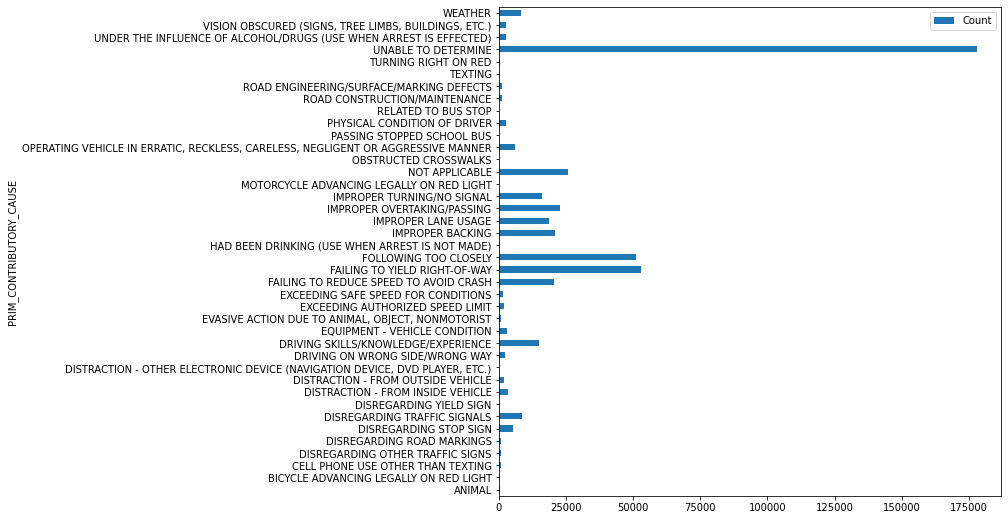

In [ ]:
# what are the reported primary top 10 causes of accidents 
reasons = df.groupby(['PRIM_CONTRIBUTORY_CAUSE']).size().reset_index(name='Count')
reasons.sort_values(by='Count', ascending=False).head(10)

reasons.plot(x='PRIM_CONTRIBUTORY_CAUSE', y='Count', kind='barh', figsize = (9,9))
print()
print()
print()
# seems like the vast majority of the accidents' reasons are "unable to determine"
# we will explore that deeper using other variables


<AxesSubplot:>

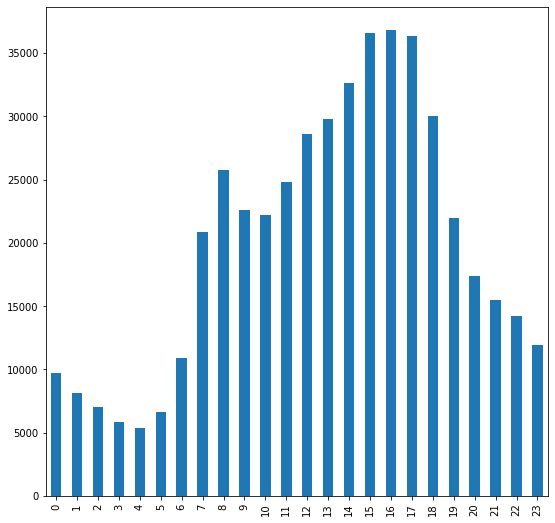

In [ ]:
# let us explore some more general statistics about the accidents
# what times do the accidents happen
time_hour = df.groupby(['CRASH_HOUR']).size().reset_index(name='Count')
time_hour['Count'].plot(kind='bar', figsize = (9,9))
print()
print()
print()

<AxesSubplot:xlabel='CRASH_DAY_OF_WEEK'>

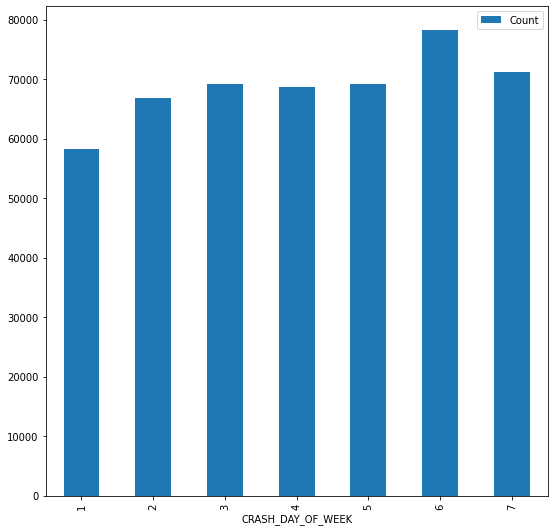

In [ ]:
# see what day of the week
day_week = df.groupby(['CRASH_DAY_OF_WEEK']).size().reset_index(name='Count')
day_week.plot(x = 'CRASH_DAY_OF_WEEK' , y = 'Count', kind='bar', figsize = (9,9))
print()
print()
print()

<AxesSubplot:xlabel='WEATHER_CONDITION'>

<AxesSubplot:ylabel='FIRST_CRASH_TYPE'>

<AxesSubplot:ylabel='LIGHTING_CONDITION'>

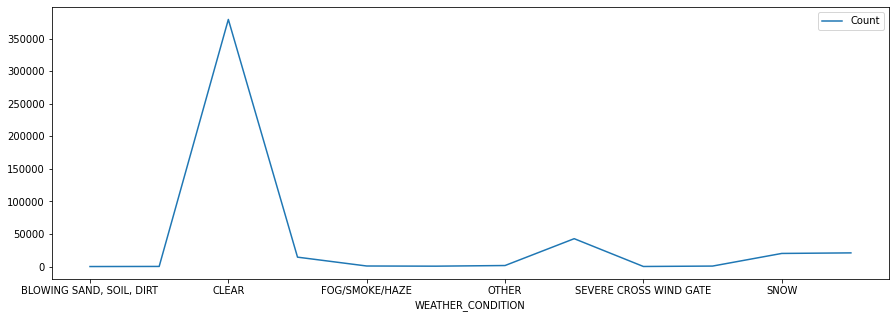

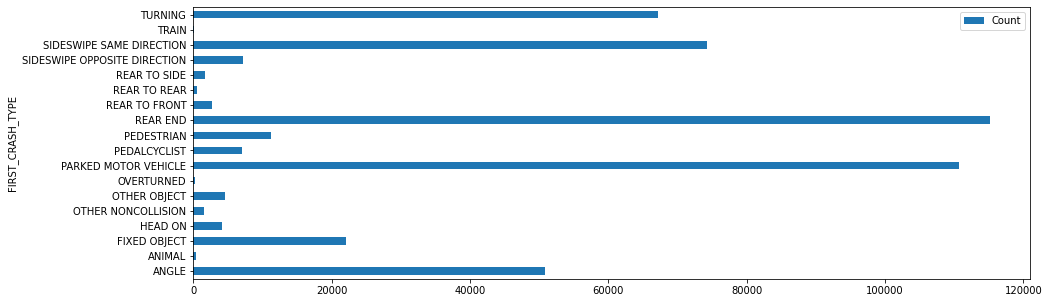

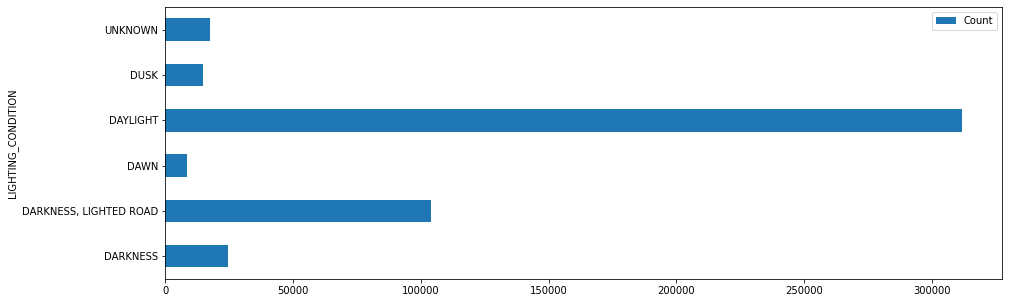

In [ ]:
# see what what weather
weather = df.groupby(['WEATHER_CONDITION']).size().reset_index(name='Count')
weather.plot(x = 'WEATHER_CONDITION', y = 'Count', figsize=(15,5))

# first crash type
crash_type = df.groupby(['FIRST_CRASH_TYPE']).size().reset_index(name='Count')
crash_type.plot(x = 'FIRST_CRASH_TYPE', y = 'Count', kind='barh', figsize=(15,5))

# lightning condition
light = df.groupby(['LIGHTING_CONDITION']).size().reset_index(name='Count')
light.plot(x = 'LIGHTING_CONDITION', y = 'Count', kind='barh', figsize=(15,5))
print()
print()
print()

<AxesSubplot:ylabel='PRIM_CONTRIBUTORY_CAUSE'>

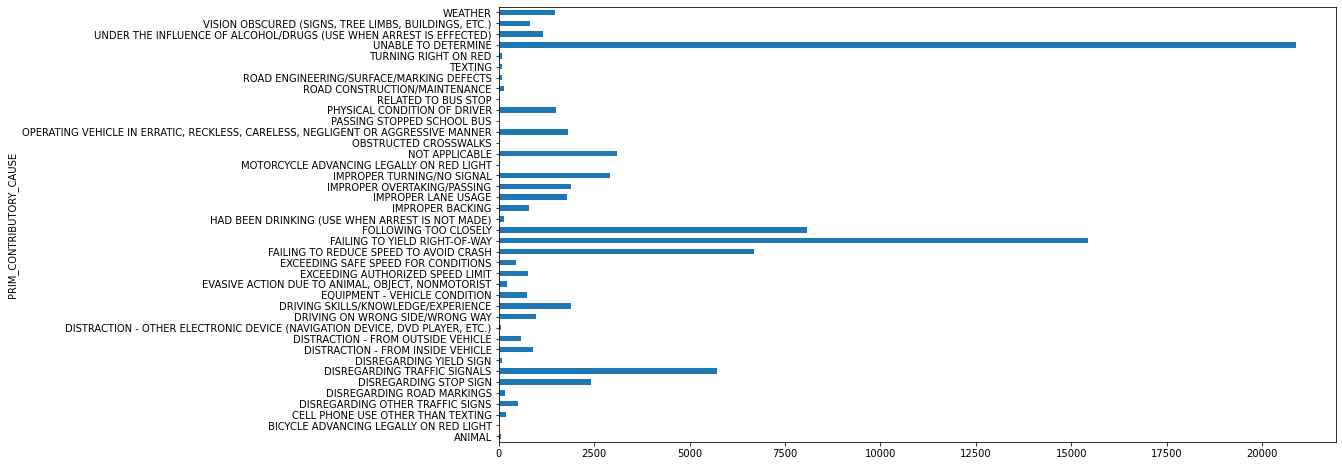

In [ ]:
import matplotlib.pyplot as plt

# see injuries total and fatal injuries per type of accident
inj = df.groupby(['PRIM_CONTRIBUTORY_CAUSE'])['INJURIES_TOTAL'].sum()
#inj
inj.plot(x = 'INJURIES_TOTAL', y = 'PRIM_CONTRIBUTORY_CAUSE', kind='barh', figsize=(15,8))




















<AxesSubplot:ylabel='PRIM_CONTRIBUTORY_CAUSE'>

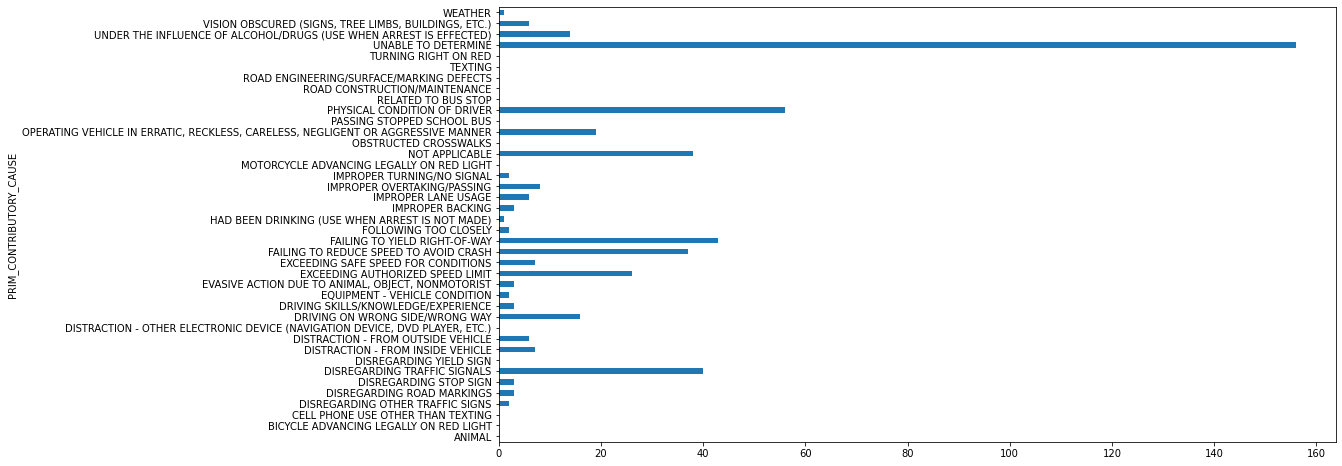

In [ ]:
# fatal accidents by type
inj_f = df.groupby(['PRIM_CONTRIBUTORY_CAUSE'])['INJURIES_FATAL'].sum()
#inj_f
inj_f.plot(x = 'INJURIES_FATAL', y = 'PRIM_CONTRIBUTORY_CAUSE', kind='barh', figsize=(15,8))
print()
print()
print()

The graph shows that the death per injury is incredibly small.


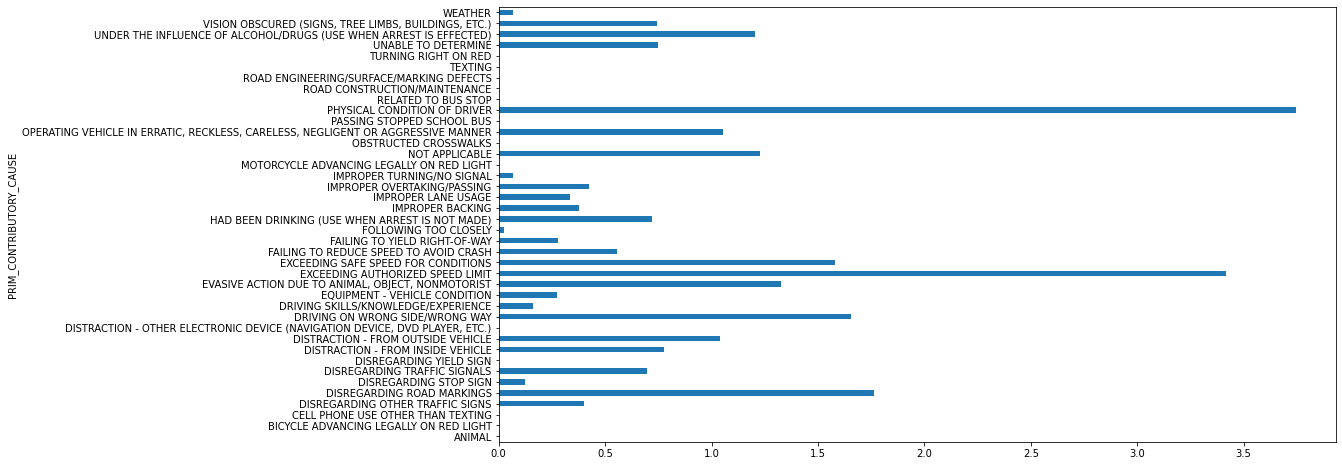

In [ ]:
# change to die based on type of accident
death_rate = (inj_f / inj)
d_r = (death_rate*100).plot(kind='barh', figsize=(15,8))

#frames_inj = [inj, inj_f]

#r = pd.concat(frames_inj, axis=1)
#r.plot(kind='barh', figsize=(15,8), xticks = range(0,25000,1000))

print('The graph shows that the death per injury is incredibly small.')

























In [ ]:
# convert date string to date format
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], errors='coerce')
df['CRASH_DATE'].head(2)

# create a column with years only
df['YEAR'] = df['CRASH_DATE'].dt.year
df.YEAR.head(2)
print()
print()
print()

0   2019-07-10
1   2017-06-30
Name: CRASH_DATE, dtype: datetime64[ns]

0    2019
1    2017
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR'>

As the graph is showing, the deadly injuries have been growing up to 2020, then the rate decreased significantly in 2021.


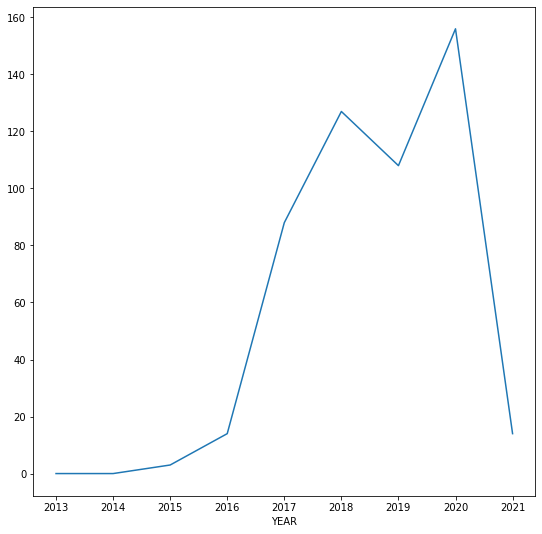

In [ ]:
# deadly accidents by year
fatal_year = df.groupby('YEAR')['INJURIES_FATAL'].sum()
fatal_year.plot(figsize=(9,9))
print('As the graph is showing, the deadly injuries have been growing up to 2020, then the rate decreased significantly in 2021.')
print()
print()
print()

,POSTED_SPEED_LIMIT,FATAL,INCAPACITATING,NON_INCAPACITATING,NO_INJURY
0,0,3.0,NaN,NaN,NaN
1,1,0.0,NaN,NaN,NaN
2,2,0.0,NaN,NaN,NaN
3,3,0.0,NaN,NaN,NaN
4,4,0.0,NaN,NaN,NaN
...,...,...,...,...,...
37,60,NaN,NaN,NaN,5.0
38,63,NaN,NaN,NaN,0.0
39,65,NaN,NaN,NaN,2.0
40,70,NaN,NaN,NaN,0.0


<AxesSubplot:xlabel='POSTED_SPEED_LIMIT'>

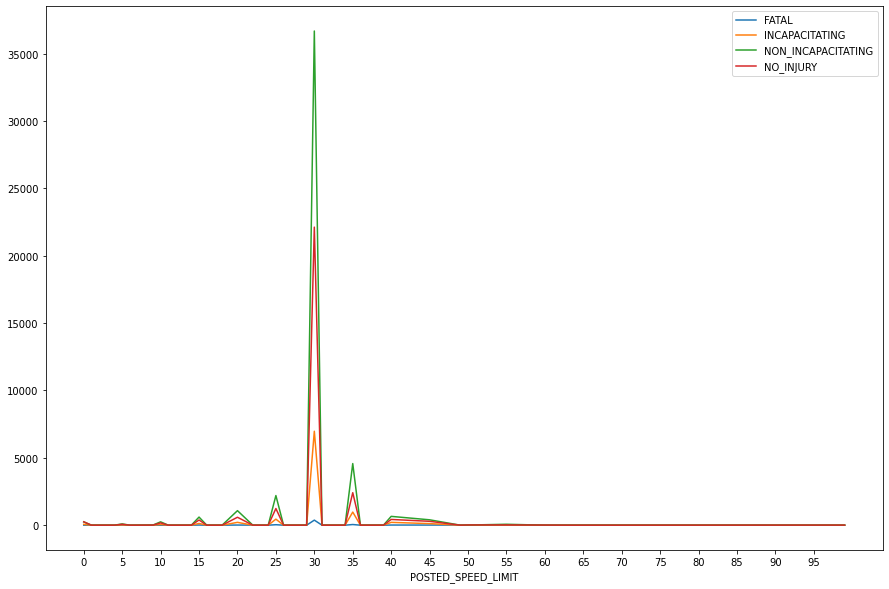

In [ ]:
# let's see the number and type of injuries based on the speed limit
# create subsets and join them
tot_inj_speed = df.groupby('POSTED_SPEED_LIMIT')['INJURIES_TOTAL'].sum().reset_index(name ='TOT')
n_inj_speed = df.groupby('POSTED_SPEED_LIMIT')['INJURIES_FATAL'].sum().reset_index(name ='FATAL')
n_inj2_speed = df.groupby('POSTED_SPEED_LIMIT')['INJURIES_INCAPACITATING'].sum().reset_index(name ='INCAPACITATING')
n_inj3_speed = df.groupby('POSTED_SPEED_LIMIT')['INJURIES_NON_INCAPACITATING'].sum().reset_index(name ='NON_INCAPACITATING')
n_inj4_speed = df.groupby('POSTED_SPEED_LIMIT')['INJURIES_REPORTED_NOT_EVIDENT'].sum().reset_index(name ='NO_INJURY')

frames_inj = [n_inj_speed, n_inj2_speed, n_inj3_speed, n_inj4_speed]
r = pd.concat(frames_inj)
r
# plot is very big with very small numbers
r.plot(x = 'POSTED_SPEED_LIMIT', figsize=(15,10), xticks = range(0,100,5))
print()
print()
print()

In [ ]:
import math
# Is there a relationship between hit and run crashes and number of fatal injuries?
hit_run = df.groupby('POSTED_SPEED_LIMIT')['HIT_AND_RUN_I'].count().reset_index(name ='COUNT')

ratio = (sum(n_inj_speed['FATAL']) / sum(hit_run['COUNT']))*100

print('It appears that hit and run accidents are not strongly correlated with fatal accidents.')
print("There's an overall ratio of {:.2f}% of fatal incidents to hit-and-run accidents".format(ratio))

hit_run_tot = df.groupby(['HIT_AND_RUN_I']).size().reset_index(name='COUNT')
hit_run_fatal = df.groupby('HIT_AND_RUN_I')['INJURIES_FATAL'].sum().reset_index(name ='SUM')

ratio2 = (sum(hit_run_fatal['SUM']) / sum(hit_run_tot['COUNT']))*100

print("There's an overall chance of {:.2f}% to die if involved in a hit-and-run accident".format(ratio2))

# lets calculate the correlation coefficient

N = len(df) # total number of cases

# x is count of all hit and run
x = hit_run_tot.iloc[int(hit_run_tot[['COUNT']].idxmax())]['COUNT']

# y is count of all fatal injuries
tot_fat = df.groupby(['INJURIES_FATAL']).size().reset_index(name='COUNT')
y = tot_fat.iloc[int(hit_run_tot[['COUNT']].idxmax())]['COUNT']

# sum(xy) = sum(1*1) = sum(y). x and y are 1 because we count them as 1 if Y, 0 if N or Nan
numerator = (N*sum(hit_run_fatal['SUM'])) - (x*y)   # sigma x*y -> x*y will be 1 only when both x and y are 1 
denominator = math.sqrt(((N*x) - (x**2))*((N*y) - (y**2)))
r = numerator / denominator
print("The correlation coefficient p is {:.4f} which is a weak correlation.".format(r))



It appears that hit and run accidents are not strongly correlated with fatal accidents.
There's an overall ratio of 0.36% of fatal incidents to hit-and-run accidents
There's an overall chance of 0.06% to die if involved in a hit-and-run accident
The correlation coefficient p is -0.0052 which is a weak correlation.


In [ ]:
# Do intersection-related crashes result in more fatal injuries?
# compare intersection deaths to non-intersection deaths
intersection_deaths = df[df.INTERSECTION_RELATED_I == 'Y']
sum_deaths = intersection_deaths['INJURIES_FATAL'].sum()
#sum_deaths

sum_deaths_tot = df['INJURIES_FATAL'].sum()
#sum_deaths_tot

ratio = sum_deaths / sum_deaths_tot
#ratio

print("There's a {:.2f} ratio intersection-deaths to total-deaths, which is quite significant.".format(ratio))
print("{:.2f}% of deadly injuries are related to intersections, we can conclude that intersections result in more deaths.".format(ratio*100))

There's a 0.33 ratio intersection-deaths to total-deaths, which is quite significant.
32.75% of deadly injuries are related to intersections, we can conclude that intersections result in more deaths.


<AxesSubplot:ylabel='PRIM_CONTRIBUTORY_CAUSE'>

,PRIM_CONTRIBUTORY_CAUSE,Count
18,FAILING TO YIELD RIGHT-OF-WAY,52982
19,FOLLOWING TOO CLOSELY,51238
23,IMPROPER OVERTAKING/PASSING,22858
21,IMPROPER BACKING,21096
17,FAILING TO REDUCE SPEED TO AVOID CRASH,20751
22,IMPROPER LANE USAGE,18637
24,IMPROPER TURNING/NO SIGNAL,15986
12,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,14968
6,DISREGARDING TRAFFIC SIGNALS,8713
39,WEATHER,8439


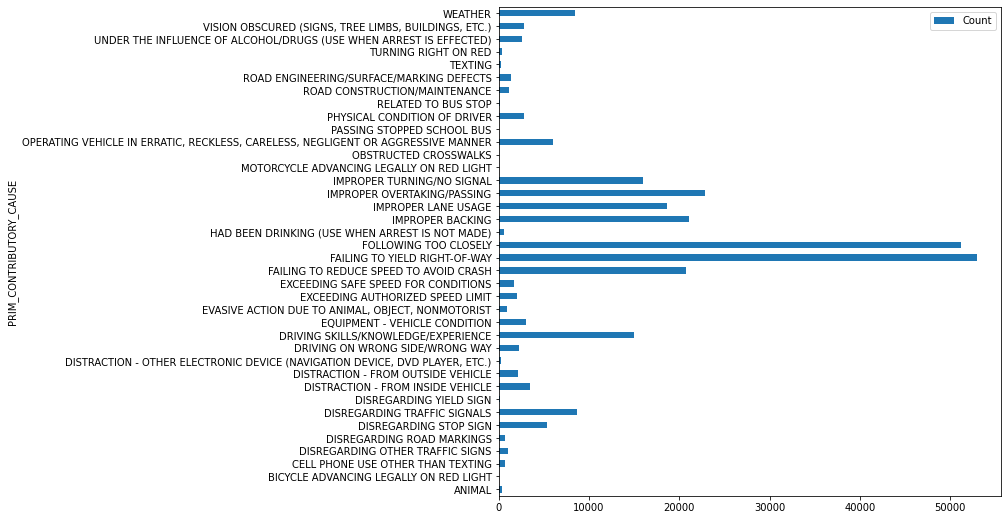

In [ ]:
# let's see how the accidents graph looks like for reasons we actually know
# remove the unable to determine and non applicable
clear_reasons = reasons[reasons.PRIM_CONTRIBUTORY_CAUSE != 'UNABLE TO DETERMINE']
clear_reasons = clear_reasons[clear_reasons.PRIM_CONTRIBUTORY_CAUSE != 'NOT APPLICABLE']

#plot the data
clear_reasons.plot(x='PRIM_CONTRIBUTORY_CAUSE', y='Count', kind='barh', figsize = (9,9))
clear_reasons.sort_values(by='Count', ascending=False).head(10)
print()
print()
print()

In [ ]:
# let us explore what other details the top 2 most popular accidents reasons have
# failing to yeld right-of-way
right_of_way = df[df.PRIM_CONTRIBUTORY_CAUSE == 'FAILING TO YIELD RIGHT-OF-WAY']
#right_of_way.head(5)

# let us see how many of these are actually reported to be intersaction related, no right of way & hit and run
intersection = right_of_way.groupby(['INTERSECTION_RELATED_I']).size().reset_index(name='Count')
print(intersection)

not_r_o_w = right_of_way.groupby(['NOT_RIGHT_OF_WAY']).size().reset_index(name='Count')
print(not_r_o_w)

print()
print()
print()

  INTERSECTION_RELATED_I  Count
0                      N    618
1                      Y  21090
  NOT_RIGHT_OF_WAY  Count
0                N    108
1                Y   1077


In [ ]:
# so far we know that most of the accidents reported are caused by a fail of yelding the right-of-way and
percent = intersection.iloc[int(intersection[['Count']].idxmax())]['Count']/clear_reasons.iloc[int(clear_reasons[['Count']].idxmax())]['Count'] * 100

print('{:.2f}% of accidents that fail to yeld right-of-way are reported on an intersection.'.format(percent))
print('It appears that the places of the accidents underreported because the yelding right-of-way happens mostly on an intersection.')

# let's see how many deaths are caused by the fail of yelding right-of-way
sum_deaths = right_of_way['INJURIES_FATAL'].sum()
#sum_deaths

sum_deaths_tot = df['INJURIES_FATAL'].sum()
#sum_deaths_tot

ratio2 = sum_deaths / sum_deaths_tot
#ratio

print("The ratio of fatal injuries due failing to yelding right-of-way to total fatal injuries is {:.2f}".format(ratio2))
print("Although deaths due intersection amount to {:.2f}%, deaths on intersections due to failing to yeld right-of-way is {:.2f}%".format(ratio*100, ratio2*100))


39.81% of accidents that fail to yeld right-of-way are reported on an intersection.
It appears that the places of the accidents underreported because the yelding right-of-way happens mostly on an intersection.
The ratio of fatal injuries due failing to yelding right-of-way to total fatal injuries is 0.08
Although deaths due intersection amount to 32.75%, deaths on intersections due to failing to yeld right-of-way is 8.43%


In [ ]:
# let's look now at the second most popular type of accident
# following too closely, this might happen for multiple reasons. Let's explore some of them
follow_too_close = df[df.PRIM_CONTRIBUTORY_CAUSE == 'FOLLOWING TOO CLOSELY']

# let's see what type of trafficway, time of the day, weather condition and roadway condition were present during these accidents
traffic_way = follow_too_close.groupby(['TRAFFICWAY_TYPE']).size().reset_index(name='Count')
#traffic_way.sort_values(by='Count', ascending=False).head(10)

time_hour = follow_too_close.groupby(['CRASH_HOUR']).size().reset_index(name='Count')
#time_hour.sort_values(by='Count', ascending=False).head(10)

weather_cond = follow_too_close.groupby(['WEATHER_CONDITION']).size().reset_index(name='Count')
#weather_cond.sort_values(by='Count', ascending=False).head(10)

road_cond = follow_too_close.groupby(['ROADWAY_SURFACE_COND']).size().reset_index(name='Count')
#road_cond.sort_values(by='Count', ascending=False).head(10)


It appears that most accidents of type "Fail to yeld right-of-way" happen under these conditions:
Trafficway: NOT DIVIDED, with 26991 accidents, amounting to 52.68% of total accidents of this type.
Weather: CLEAR, with 41507 accidents, amounting to 81.01% of total accidents of this type.
Road Condition: DRY, with 39133 accidents, amounting to 76.37% of total accidents of this type.
Time of accidents:


<AxesSubplot:>

Contrary to popular belief, most accidents appear not to be because of the environment, but rather because of human error.


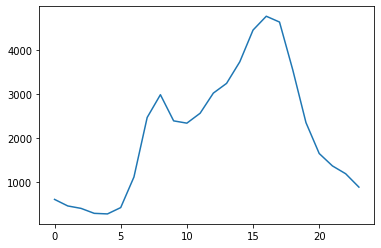

In [ ]:
print('It appears that most accidents of type "Follow too close" happen under these conditions:')
t = traffic_way.sort_values(by='Count', ascending=False)
tt = t.iloc[0]['TRAFFICWAY_TYPE']
tn = t.iloc[0]['Count']
tpercent = tn/sum(traffic_way['Count'])*100
print('Trafficway: {}, with {} accidents, amounting to {:.2f}% of total accidents of this type.'.format(tt, tn, tpercent))

w = weather_cond.sort_values(by='Count', ascending=False)
ww = w.iloc[0]['WEATHER_CONDITION']
wn = w.iloc[0]['Count']
wpercent = wn/sum(weather_cond['Count'])*100
print('Weather: {}, with {} accidents, amounting to {:.2f}% of total accidents of this type.'.format(ww, wn, wpercent))

r = road_cond.sort_values(by='Count', ascending=False)
rr = r.iloc[0]['ROADWAY_SURFACE_COND']
rn = r.iloc[0]['Count']
rpercent = rn/sum(weather_cond['Count'])*100
print('Road Condition: {}, with {} accidents, amounting to {:.2f}% of total accidents of this type.'.format(rr, rn, rpercent))

print('Time of accidents:')
time_hour['Count'].plot()

print('Contrary to popular belief, most accidents appear not to be because of the environment, but rather because of human error.')
print()
print()
print()

It appears that most accidents of type "UNABLE TO DETERMINE" happen under these conditions:
Trafficway: NOT DIVIDED, with 79462 accidents, amounting to 44.64% of total accidents of this type.
Weather: CLEAR, with 138237 accidents, amounting to 77.66% of total accidents of this type.
Road Condition: DRY, with 129209 accidents, amounting to 72.59% of total accidents of this type.
Time of accidents:


<AxesSubplot:>

Contrary to popular belief, most accidents appear not to be because of the environment, but rather because of human error.


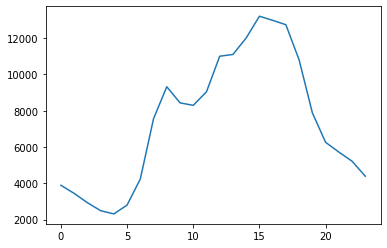

In [ ]:
# let's now explore the 'unable to determine' and 'non applicable' types of accident to see if there's any correlation with other data

non_det_df = df[df.PRIM_CONTRIBUTORY_CAUSE == 'UNABLE TO DETERMINE']
#non_det_df.head(5)

# lets compare the non_determined to the determined accident types

traffic_way_nd = non_det_df.groupby(['TRAFFICWAY_TYPE']).size().reset_index(name='Count')
#traffic_way_nd.sort_values(by='Count', ascending=False).head(20)

time_hour_nd = non_det_df.groupby(['CRASH_HOUR']).size().reset_index(name='Count')
#time_hour.sort_values(by='Count', ascending=False).head(10)

weather_cond_nd = non_det_df.groupby(['WEATHER_CONDITION']).size().reset_index(name='Count')
#weather_cond.sort_values(by='Count', ascending=False).head(10)

road_cond_nd = non_det_df.groupby(['ROADWAY_SURFACE_COND']).size().reset_index(name='Count')
#road_cond.sort_values(by='Count', ascending=False).head(10)

print('It appears that most accidents of type "UNABLE TO DETERMINE" happen under these conditions:')
tnd = traffic_way_nd.sort_values(by='Count', ascending=False)
ttnd = tnd.iloc[0]['TRAFFICWAY_TYPE']
tnnd = tnd.iloc[0]['Count']
tndpercent = tnnd/sum(traffic_way_nd['Count'])*100
print('Trafficway: {}, with {} accidents, amounting to {:.2f}% of total accidents of this type.'.format(ttnd, tnnd, tndpercent))

wnd = weather_cond_nd.sort_values(by='Count', ascending=False)
wwnd = wnd.iloc[0]['WEATHER_CONDITION']
wnnd = wnd.iloc[0]['Count']
wndpercent = wnnd/sum(weather_cond_nd['Count'])*100
print('Weather: {}, with {} accidents, amounting to {:.2f}% of total accidents of this type.'.format(wwnd, wnnd, wndpercent))

rnd = road_cond_nd.sort_values(by='Count', ascending=False)
rrnd = rnd.iloc[0]['ROADWAY_SURFACE_COND']
rnnd = rnd.iloc[0]['Count']
rndpercent = rnnd/sum(road_cond_nd['Count'])*100
print('Road Condition: {}, with {} accidents, amounting to {:.2f}% of total accidents of this type.'.format(rrnd, rnnd, rndpercent))

print('Time of accidents:')
time_hour_nd['Count'].plot()

print('The "UNABLE TO DETERMINE" subset of accidents is relatively similtar to the defined type of accidents subset.')
print()
print()
print()


In [ ]:
# as a final thought, let us see how death rate of this specific type of accident is related to traffic control devices, 
# device condition and damage

tot_d_nd = non_det_df['INJURIES_FATAL'].sum()

tot_d = df['INJURIES_FATAL'].sum()

percent_d_nd = (tot_d_nd / tot_d)*100

traffic_dev_death_nd = non_det_df.groupby('TRAFFIC_CONTROL_DEVICE')['INJURIES_FATAL'].sum().reset_index(name='DEATHS')
#traffic_dev_death_nd

tdd_nd = traffic_dev_death_nd.sort_values(by='DEATHS', ascending=False)
a = tdd_nd.iloc[0]['TRAFFIC_CONTROL_DEVICE']
b = tdd_nd.iloc[0]['DEATHS']

dev_death_nd = non_det_df.groupby('DEVICE_CONDITION')['INJURIES_FATAL'].sum().reset_index(name='DEATHS')
#dev_death_nd

tdd_nd2 = dev_death_nd.sort_values(by='DEATHS', ascending=False)
a2 = tdd_nd2.iloc[1]['DEVICE_CONDITION']
b2 = tdd_nd2.iloc[1]['DEATHS']

dmg_death_nd = non_det_df.groupby('DAMAGE')['INJURIES_FATAL'].sum().reset_index(name='DEATHS')
#dmg_death_nd

tdd_nd3 = dmg_death_nd.sort_values(by='DEATHS', ascending=False)
a3 = tdd_nd3.iloc[0]['DAMAGE']
b3 = tdd_nd3.iloc[0]['DEATHS']

print("There's been {} deaths by unspecified accident type out of {} total deaths. A {:.2f}% of the total.".format(tot_d_nd, tot_d, percent_d_nd))
print("Most of the accidents use traffic control: {}, total deaths: {}.".format(a, b))
print("Second type of most accidents' devices: {}, total deaths: {}.".format(a2, b2))
print("Most of the accidents causing death also do damages: {}, {:.2f}% of the time.".format(a3, 100*(b3/tot_d_nd)))


There's been 156.0 deaths by unspecified accident type out of 510.0 total deaths. A 30.59% of the total.
Most of the accidents use traffic control: NO CONTROLS, total deaths: 106.0.
Second type of most accidents' devices: FUNCTIONING PROPERLY, total deaths: 45.0.
Most of the accidents causing death also do damages: OVER $1,500, 85.90% of the time.


<AxesSubplot:>

As the graph shows, most of the deaths for accidents of unspecified reasons happen at night between 20 and 03


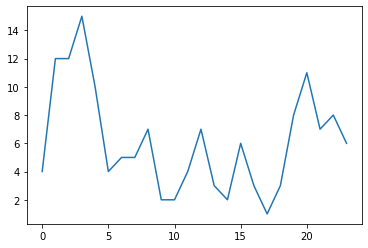

In [ ]:
# let us see what are the times most deaths happen in this subset of accidents
fatal_nd = non_det_df[non_det_df['INJURIES_FATAL'] > 0]
fatal_nd_time = fatal_nd.groupby(['CRASH_HOUR']).size().reset_index(name='Count')
fatal_nd_time['Count'].plot()

print("As the graph shows, most of the deaths for accidents of unspecified reasons happen at night between 20 and 03")
print()
print()
print()